In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from tqdm import tqdm
import time


C:\Users\Heysoos\anaconda3\envs\torchstuff\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## LIF

In [7]:
from iafCA import iafCA

RADIUS=10
def init_model(res, plasticity=False, lr=5e-2):
    ca = iafCA(RADIUS=RADIUS).cuda() 
    return (ca, ca.initGrid((res, res)))

In [8]:
sizes = [int(np.sqrt(i)) for i in 2 ** np.arange(11, 26)]
print(sizes)

res = []
for RES in tqdm(sizes):
    with torch.no_grad():
        model, state = init_model(RES) 
        state = model.forward(state)
        print(f'Starting model with {state[0, 0].numel()} elements.')

        t_start = time.time()
        for i in range(1000):
            state = model.forward(state)
        t_end = time.time()
    
    elapsed_time = t_end - t_start
    print(f'Time elapsed: {elapsed_time:.2f}')
    res.append(elapsed_time)

[45, 64, 90, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2896, 4096, 5792]


  0%|          | 0/15 [00:00<?, ?it/s]

Starting model with 2025 elements.


  7%|▋         | 1/15 [00:01<00:27,  1.96s/it]

Starting model with 4096 elements.


 13%|█▎        | 2/15 [00:03<00:21,  1.63s/it]

Starting model with 8100 elements.


 20%|██        | 3/15 [00:04<00:17,  1.48s/it]

Starting model with 16384 elements.


 27%|██▋       | 4/15 [00:05<00:15,  1.42s/it]

Starting model with 32761 elements.


 33%|███▎      | 5/15 [00:07<00:14,  1.42s/it]

Starting model with 65536 elements.


 40%|████      | 6/15 [00:08<00:12,  1.39s/it]

Starting model with 131044 elements.


 47%|████▋     | 7/15 [00:10<00:11,  1.43s/it]

Starting model with 262144 elements.


 47%|████▋     | 7/15 [00:11<00:13,  1.68s/it]


KeyboardInterrupt: 

Text(0.5, 1.0, 'No plasticity')

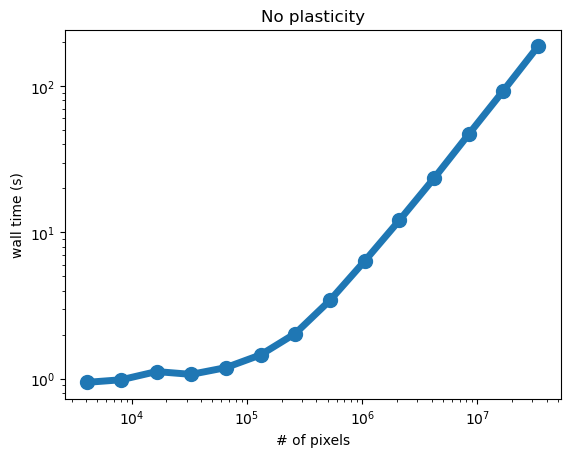

In [13]:
plt.plot([s*s for s in sizes[:len(res)]], res, '-o', lw=5, ms=10)
plt.xscale('log')
# plt.xticks([5000, 10000, 100000, 200000])
plt.yscale('log')
plt.xlabel('# of pixels')
plt.ylabel('wall time (s)')
plt.title('No plasticity')

In [15]:
data = np.array([ [sizes[i], res[i]] for i in range(len(res)) ])
np.save('iafCA_times.npy', data)

## LIF with local plasticity

------

In [2]:
from iafCA_local import iafCA_local

RADIUS=10
def init_plastic_model(res, plasticity=True, lr=5e-2):
    ca = iafCA_local(RES=(res, res), RADIUS=RADIUS).cuda() 
    ca.rule.plasticity = plasticity
    ca.rule.plastic_lr = lr
    
    return (ca, ca.initGrid())

In [ ]:
sizes = sizes = [int(np.sqrt(i)) for i in 2 ** np.arange(11, 22)]
print(sizes)

res_plastic = []
for RES in tqdm(sizes):
    with torch.no_grad():
        model, state = init_plastic_model(RES) 
        state = model.forward(state)
        print(f'Starting model with {state[0, 0].numel()} elements.')

        t_start = time.time()
        for i in range(1000):
            state = model.forward(state)
        t_end = time.time()
    elapsed_time = t_end - t_start
    print(f'Time elapsed: {elapsed_time:.2f}')
    res_plastic.append(elapsed_time)

[45, 64, 90, 128, 181, 256, 362, 512, 724, 1024, 1448]


  0%|          | 0/11 [00:00<?, ?it/s]C:\Users\Heysoos\anaconda3\envs\torchstuff\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Starting model with 2025 elements.


  9%|▉         | 1/11 [00:02<00:27,  2.76s/it]

Starting model with 4096 elements.


 18%|█▊        | 2/11 [00:05<00:25,  2.80s/it]

Starting model with 8100 elements.


 27%|██▋       | 3/11 [00:09<00:27,  3.43s/it]

Starting model with 16384 elements.


 36%|███▋      | 4/11 [00:16<00:33,  4.82s/it]

Starting model with 32761 elements.


 45%|████▌     | 5/11 [00:29<00:45,  7.60s/it]

Starting model with 65536 elements.


 55%|█████▍    | 6/11 [00:52<01:05, 13.03s/it]

Starting model with 131044 elements.


 64%|██████▎   | 7/11 [01:39<01:35, 23.91s/it]

Starting model with 262144 elements.


------------

In [ ]:
plt.plot([s*s for s in sizes[:len(res_plastic)]], res_plastic, '-o', lw=5, ms=10)
plt.xscale('log')
# plt.xticks([5000, 10000, 100000, 200000])
plt.yscale('log')
plt.xlabel('# of pixels')
plt.ylabel('wall time (s)')
plt.title('With plasticity')

In [ ]:
data = np.array([ [sizes[i], res_plastic[i]] for i in range(len(res_plastic)) ])
np.save('iafCA_local_times.npy', data)